Notebook for basic data cleaning(regex + tokenization). Data are loaded from database, and then saved to ../data/data_raw.csv(features + target) and to ./data/data.csv(features + target + binary columns + comments)

## Loading data

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
db_path = '../database.db'
engine = create_engine(f'sqlite:///{db_path}')

In [3]:
df = pd.read_sql_table('puzzles', con=engine)
df.head()

,id,code,rules,difficulty,types,comments
0,1,000001,Ordnen Sie allen Buchstaben des Alphabets eine...,4,ABCtje,"am 15. August 2021, 13:32 Uhr von uvo_mod Labe..."
1,2,000002,Teile beide Diagramme in 12 unterschiedliche P...,2,Unknown,"am 29. Oktober 2023, 17:40 Uhr von damasosos92..."
2,3,000003,Befindet sich zwischen zwei Ziffern ein schwar...,2,Kropki,"am 19. Mai 2023, 06:02 Uhr von Dandelo @alewis..."
3,4,000006,Hier noch die Anleitungen zu den beiden Einzel...,3,"Hochhäuser, Fillomino","am 27. Juni 2023, 06:29 Uhr von DiMono Penpa+ ..."
4,5,000009,Und das ist zu tun: In das Diagramm sollen Zif...,1,Magisches Labyrinth,"am 20. März 2024, 18:39 Uhr von DanSkorne Enjo..."


In [4]:
unique_difficulties = df['difficulty'].unique()

print("Unique values in 'difficulty' column after mapping and reloading:")
print(unique_difficulties)

Unique values in 'difficulty' column after mapping and reloading:
[4 2 3 1 5]


## Data imbalance

In [5]:
import matplotlib.pyplot as plt

In [6]:
def display_data_imbalance(df):
    difficulty_counts = df['difficulty'].value_counts(normalize=True) * 100 
    
    plt.figure(figsize=(6, 6)) 
    plt.pie(
        difficulty_counts, 
        labels=difficulty_counts.index, 
        autopct='%1.1f%%',  
        startangle=140,     
    )
    plt.title('Distribution of Puzzle Difficulty Levels')
    plt.axis('equal')
    plt.show()

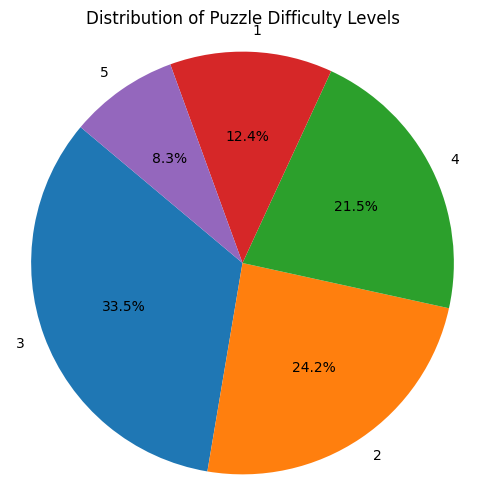

In [7]:
display_data_imbalance(df)

## Dropping non-english rule sets

In [5]:
from langdetect import detect, DetectorFactory

In [6]:
DetectorFactory.seed = 0

In [7]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [8]:
df = df[df['rules'].apply(is_english)]

print("Number of rows with English rules:", len(df))

Number of rows with English rules: 10999


In [9]:
df.head()

,id,code,rules,difficulty,types,comments
0,1,000001,Ordnen Sie allen Buchstaben des Alphabets eine...,4,ABCtje,"am 15. August 2021, 13:32 Uhr von uvo_mod Labe..."
1,2,000002,Teile beide Diagramme in 12 unterschiedliche P...,2,Unknown,"am 29. Oktober 2023, 17:40 Uhr von damasosos92..."
5,6,00000A,Ordnen Sie allen Buchstaben des Alphabets eine...,4,ABCtje,"am 15. August 2021, 13:37 Uhr von uvo_mod Labe..."
12,13,00000N,Teile das L in 9 unterschiedliche Pentomino un...,2,Unknown,"am 15. Oktober 2022, 06:15 Uhr von Richard Add..."
13,14,00000O,Solve online inF-PuzzlesorCtC-app(thx Nick Smi...,4,"Sudoku, Consecutive (Variante)","am 9. Oktober 2022, 08:48 Uhr von Richard Adde..."


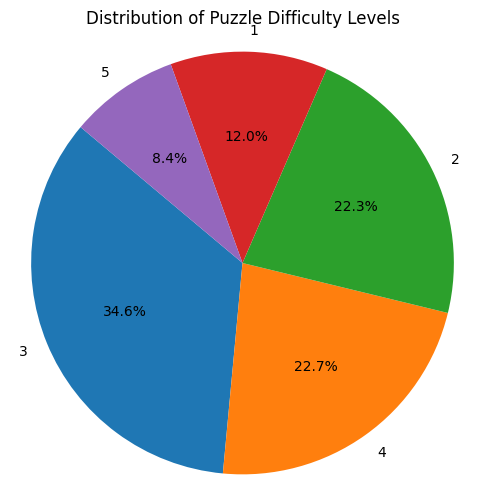

In [13]:
display_data_imbalance(df)

## Taking 10000 instances from dataframe

In [10]:
df = df.tail(10000)

print("Number of instances in the DataFrame:", len(df))

Number of instances in the DataFrame: 10000


In [11]:
df.head()

,id,code,rules,difficulty,types,comments
3824,3825,0004QD,"Plato is feeling unwell. As a hypochondriac, h...",3,"Sudoku, Thermo (Variante), Primzahlen (Thema)","am 18. November 2020, 11:40 Uhr von steelwool ..."
3826,3827,0004QH,"""Friends, Romans, countrymen, lend me your ear...",4,"Sudoku, Roman Numerals (Variante), XV (Variante)","am 31. März 2024, 04:19 Uhr von RockyRoer Adde..."
3827,3828,0004QI,The standard Yin-Yang rules apply.,2,Yin und Yang,"am 9. Dezember 2020, 02:39 Uhr von AsilG Tough..."
3829,3830,0004QL,PenpaStandard Sudoku Rules apply to the final ...,3,"Sudoku, Diagonal (Variante), Killer (Variante)","am 13. November 2023, 08:17 Uhr von jwmpuz Wha..."
3830,3831,0004QM,The Ring (Killer/Little Killer Sudoku) by Wess...,3,Sudoku,"am 18. November 2020, 09:02 Uhr von smistry @s..."


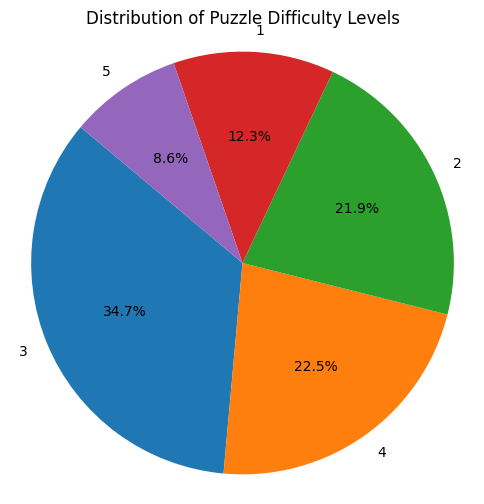

In [16]:
display_data_imbalance(df)

## Remove non-ASCII

In [12]:
import re

In [14]:
def remove_non_ascii(text):
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Remove non-English characters (retain only letters, numbers, and common punctuation)
    text = re.sub(r'[^A-Za-z0-9\s.,?!\'\"-]+', '', text)
    
    # Remove additional unwanted characters like newlines, tabs, etc.
    text = re.sub(r'[\n\r\t]+', ' ', text)

    text = text.strip()
    
    return text

In [15]:
df['rules'] = df['rules'].apply(lambda x: remove_non_ascii(x) if isinstance(x, str) else x)

print("Number of instances in the DataFrame:", len(df))

Number of instances in the DataFrame: 10000


In [16]:
df.head()

,id,code,rules,difficulty,types,comments
3824,3825,0004QD,"Plato is feeling unwell. As a hypochondriac, h...",3,"Sudoku, Thermo (Variante), Primzahlen (Thema)","am 18. November 2020, 11:40 Uhr von steelwool ..."
3826,3827,0004QH,"""Friends, Romans, countrymen, lend me your ear...",4,"Sudoku, Roman Numerals (Variante), XV (Variante)","am 31. März 2024, 04:19 Uhr von RockyRoer Adde..."
3827,3828,0004QI,The standard Yin-Yang rules apply.,2,Yin und Yang,"am 9. Dezember 2020, 02:39 Uhr von AsilG Tough..."
3829,3830,0004QL,PenpaStandard Sudoku Rules apply to the final ...,3,"Sudoku, Diagonal (Variante), Killer (Variante)","am 13. November 2023, 08:17 Uhr von jwmpuz Wha..."
3830,3831,0004QM,The Ring KillerLittle Killer Sudoku by Wessel ...,3,Sudoku,"am 18. November 2020, 09:02 Uhr von smistry @s..."


## Remove stopwords

In [17]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lewelotki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
def remove_stopwords(text):
    
    text = text.lower()
    
    text = re.sub(r'\b\w{1}\b', '', text) 
    
    cleaned_words = [word for word in text.split() if word not in stop_words]
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

In [20]:
df['rules'] = df['rules'].apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)
df.head()

,id,code,rules,difficulty,types,comments
3824,3825,0004QD,"plato feeling unwell. hypochondriac, thermomet...",3,"Sudoku, Thermo (Variante), Primzahlen (Thema)","am 18. November 2020, 11:40 Uhr von steelwool ..."
3826,3827,0004QH,"""friends, romans, countrymen, lend ears come b...",4,"Sudoku, Roman Numerals (Variante), XV (Variante)","am 31. März 2024, 04:19 Uhr von RockyRoer Adde..."
3827,3828,0004QI,standard yin-yang rules apply.,2,Yin und Yang,"am 9. Dezember 2020, 02:39 Uhr von AsilG Tough..."
3829,3830,0004QL,penpastandard sudoku rules apply final numeric...,3,"Sudoku, Diagonal (Variante), Killer (Variante)","am 13. November 2023, 08:17 Uhr von jwmpuz Wha..."
3830,3831,0004QM,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,"am 18. November 2020, 09:02 Uhr von smistry @s..."


## Remove punctuation

In [21]:
import string

In [22]:
def remove_punctuation(text):
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    return text

In [23]:
df['rules'] = df['rules'].apply(lambda x: remove_punctuation(x) if isinstance(x, str) else x)
df.head()

,id,code,rules,difficulty,types,comments
3824,3825,0004QD,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)","am 18. November 2020, 11:40 Uhr von steelwool ..."
3826,3827,0004QH,friends romans countrymen lend ears come bury ...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)","am 31. März 2024, 04:19 Uhr von RockyRoer Adde..."
3827,3828,0004QI,standard yinyang rules apply,2,Yin und Yang,"am 9. Dezember 2020, 02:39 Uhr von AsilG Tough..."
3829,3830,0004QL,penpastandard sudoku rules apply final numeric...,3,"Sudoku, Diagonal (Variante), Killer (Variante)","am 13. November 2023, 08:17 Uhr von jwmpuz Wha..."
3830,3831,0004QM,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,"am 18. November 2020, 09:02 Uhr von smistry @s..."


## Lemmatization and tokenization

In [24]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [25]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/lewelotki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/lewelotki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/lewelotki/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
def tokenize_and_lemmatize(text):
    
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [28]:
df['tokens'] = df['rules'].apply(lambda x: tokenize_and_lemmatize(x) if isinstance(x, str) else x)
df['rules'] = df['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df = df.drop('tokens', axis=1)
df.head()

,id,code,rules,difficulty,types,comments
3824,3825,0004QD,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)","am 18. November 2020, 11:40 Uhr von steelwool ..."
3826,3827,0004QH,friend roman countryman lend ear come bury cae...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)","am 31. März 2024, 04:19 Uhr von RockyRoer Adde..."
3827,3828,0004QI,standard yinyang rule apply,2,Yin und Yang,"am 9. Dezember 2020, 02:39 Uhr von AsilG Tough..."
3829,3830,0004QL,penpastandard sudoku rule apply final numerica...,3,"Sudoku, Diagonal (Variante), Killer (Variante)","am 13. November 2023, 08:17 Uhr von jwmpuz Wha..."
3830,3831,0004QM,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,"am 18. November 2020, 09:02 Uhr von smistry @s..."


## Saving raw data

In [29]:
import os

In [30]:
df_to_save = df[['rules', 'difficulty', 'types', 'comments']].rename(columns={'rules': 'features', 'difficulty': 'target'})

In [31]:
output_dir = '../data'
os.makedirs(output_dir, exist_ok=True)

In [32]:
output_path = os.path.join(output_dir, 'data.csv')
df_to_save.to_csv(output_path, index=False)

print(f"Data has been saved to {output_path}")

Data has been saved to ../data/data.csv


## tf-idf vectorization

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import json

In [45]:
df = pd.read_csv('../data/data.csv')

In [40]:
vectorizer = TfidfVectorizer(max_features=10000)

tfidf_matrix = vectorizer.fit_transform(df['features'])

In [41]:
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (10000, 10000)


In [42]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 377566 stored elements and shape (10000, 10000)>

In [43]:
df['features_vectorized'] = list(tfidf_matrix.toarray())
df.head()

,features,target,types,comments,features_vectorized
0,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)","am 18. November 2020, 11:40 Uhr von steelwool ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,friend roman countryman lend ear come bury cae...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)","am 31. März 2024, 04:19 Uhr von RockyRoer Adde...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,standard yinyang rule apply,2,Yin und Yang,"am 9. Dezember 2020, 02:39 Uhr von AsilG Tough...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,penpastandard sudoku rule apply final numerica...,3,"Sudoku, Diagonal (Variante), Killer (Variante)","am 13. November 2023, 08:17 Uhr von jwmpuz Wha...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,"am 18. November 2020, 09:02 Uhr von smistry @s...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [44]:
df['features'] = df['features_vectorized'].apply(lambda x: json.dumps(x.tolist()) if isinstance(x, np.ndarray) else x)

## Cleaning comments

In [33]:
df = pd.read_csv('../data/data.csv')

In [34]:
df.head()

,features,target,types,comments
0,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)","am 18. November 2020, 11:40 Uhr von steelwool ..."
1,friend roman countryman lend ear come bury cae...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)","am 31. März 2024, 04:19 Uhr von RockyRoer Adde..."
2,standard yinyang rule apply,2,Yin und Yang,"am 9. Dezember 2020, 02:39 Uhr von AsilG Tough..."
3,penpastandard sudoku rule apply final numerica...,3,"Sudoku, Diagonal (Variante), Killer (Variante)","am 13. November 2023, 08:17 Uhr von jwmpuz Wha..."
4,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,"am 18. November 2020, 09:02 Uhr von smistry @s..."


In [35]:
df.iloc[1000]['comments']

"am 22. Juni 2021, 20:15 Uhr von bigger Ok, this is really weird. First of all, it's a one star. If I think it's very easy, anyone who think otherwise has a big problem. It's not like a four star annoyance agreement problem. If you disagree with the stars, leave a comment and let me know why. I've seen coloring only two stars and MSLS or je not 5 star. So you are going to justify your stars why it's hard. Good luck with your reasoning. Second, why so many people? You do know I'll check my puzzles some points on the future. This kind of weird surge reveals what your preference is. In This case, a meh idea. The problem is Old Miles made puzzles for fun. So there might be a anniversary type puzzle for here. But if he check the data, he might give up the idea of making one.(I kind of give up, so chances are he might too) Anyway, stop giving this puzzle attention. I don't want anyone to paraphrase this rule, unless with twists. I refuse to believe you like this one more. It's a variant that

In [36]:
import re
import pandas as pd

def clean_comment(comment):
    '''deleting am date von username pattern'''
    pattern = r"am\s[\d]{1,2}\.\s\w+\s[\d]{4},\s[\d]{1,2}:[\d]{2}\sUhr\s[von]+\s[\w]+"
    cleaned_comment = re.sub(pattern, '', comment)
    return cleaned_comment.strip()

df['comments'] = df['comments'].apply(clean_comment)

In [37]:
df.head()

,features,target,types,comments
0,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)",Added a comment about how to work out the solu...
1,friend roman countryman lend ear come bury cae...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)",Added roman numerals tag
2,standard yinyang rule apply,2,Yin und Yang,Tougher than expected for a 1-star difficult p...
3,penpastandard sudoku rule apply final numerica...,3,"Sudoku, Diagonal (Variante), Killer (Variante)",What a fun puzzle requiring a tremendously won...
4,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,@smistry Thanks! Glad you liked it:) thanks fo...


In [38]:
df['comments'] = df['comments'].apply(lambda x: remove_non_ascii(x) if isinstance(x, str) else x)

print("Number of instances in the DataFrame:", len(df))

Number of instances in the DataFrame: 10000


In [39]:
df['comments'] = df['comments'].apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)
df.head()

,features,target,types,comments
0,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)",added comment work solution code!
1,friend roman countryman lend ear come bury cae...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)",added roman numerals tag
2,standard yinyang rule apply,2,Yin und Yang,"tougher expected -star difficult puzzle, maybe..."
3,penpastandard sudoku rule apply final numerica...,3,"Sudoku, Diagonal (Variante), Killer (Variante)",fun puzzle requiring tremendously wonderful va...
4,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,"smistry thanks! glad liked thanks setting, nic..."


In [40]:
df['comments'] = df['comments'].apply(lambda x: remove_punctuation(x) if isinstance(x, str) else x)
df.head()

,features,target,types,comments
0,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)",added comment work solution code
1,friend roman countryman lend ear come bury cae...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)",added roman numerals tag
2,standard yinyang rule apply,2,Yin und Yang,tougher expected star difficult puzzle maybe ...
3,penpastandard sudoku rule apply final numerica...,3,"Sudoku, Diagonal (Variante), Killer (Variante)",fun puzzle requiring tremendously wonderful va...
4,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,smistry thanks glad liked thanks setting nice ...


In [41]:
df['tokens'] = df['comments'].apply(lambda x: tokenize_and_lemmatize(x) if isinstance(x, str) else x)
df['comments'] = df['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df = df.drop('tokens', axis=1)
df.head()

,features,target,types,comments
0,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)",added comment work solution code
1,friend roman countryman lend ear come bury cae...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)",added roman numeral tag
2,standard yinyang rule apply,2,Yin und Yang,tougher expected star difficult puzzle maybe f...
3,penpastandard sudoku rule apply final numerica...,3,"Sudoku, Diagonal (Variante), Killer (Variante)",fun puzzle requiring tremendously wonderful va...
4,ring killerlittle killer sudoku wessel strijks...,3,Sudoku,smistry thanks glad liked thanks setting nice ...


In [42]:
df.to_csv(output_path, index=False)

print(f"Data has been saved to {output_path}")

Data has been saved to ../data/data.csv


## Conctacte features and comments

In [62]:
df['features'] = df['features'] + ' ' + df['comments']
df = df.drop(columns=['comments'])
df.head()

,features,target,types
0,plato feeling unwell hypochondriac thermometer...,3,"Sudoku, Thermo (Variante), Primzahlen (Thema)"
1,friend roman countryman lend ear come bury cae...,4,"Sudoku, Roman Numerals (Variante), XV (Variante)"
2,standard yinyang rule apply tougher expected s...,2,Yin und Yang
3,penpastandard sudoku rule apply final numerica...,3,"Sudoku, Diagonal (Variante), Killer (Variante)"
4,ring killerlittle killer sudoku wessel strijks...,3,Sudoku


In [63]:
df.to_csv(output_path, index=False)

print(f"Data has been saved to {output_path}")

Data has been saved to ../data/data.csv


## Cleaning types

In [43]:
df['types'].unique()

array(['Sudoku, Thermo (Variante), Primzahlen (Thema)',
       'Sudoku, Roman Numerals (Variante), XV (Variante)', 'Yin und Yang',
       ...,
       'Sudoku, Kropki, Disjoint Groups (Variante), Renban (Variante), Killer (Variante), Region Sum Lines (Variante)',
       'Sudoku, Killer (Variante), German Whispers (Variante), Between (Variante)',
       'Sudoku, Thermo (Variante), Anti-Knight (Variante), Killer (Variante), Arrows (Variante)'],
      dtype=object)

In [44]:
import itertools

split_types = df['types'].str.split(', ')

unique_types = set(itertools.chain.from_iterable(split_types))

print(unique_types)

{'Tapa', 'Nurimisaki', 'Kompass', 'Palindrome (Variante)', 'Anti-Queen (Variante)', '10-in-9 (Variante)', 'Modifier Cells (Variante)', 'Arrows (Variante)', 'Anti-Diagonal (Variante)', 'Region Sum Lines (Variante)', 'Nurikabe', 'Zeltlager', 'Binairo (Variante)', 'Kropki Pairs (Variante)', 'Sashigane', 'Hamle', 'Battlefield (Variante)', 'Odd Pairs (Variante)', 'Minesweeper', 'Entropie (Thema)', 'Römische Summen', 'Magisches Labyrinth', 'Broken 159 (Variante)', 'Doppelblock', 'Kropki', 'Renban (Variante)', 'Wortschlangen', 'Wortsuche', 'Compass (Variante)', 'Hitori', 'Linesweeper', 'Samurai (Variante)', 'Japanische Summen', 'XY-Differences (Variante)', 'Between (Variante)', 'Slingshot (Variante)', 'Pathway (Variante)', 'Galaxien', 'Suguru', 'Kakuro', 'LITS', 'Hakyuu', 'Anti-Factor Lines (Variante)', 'Quadruple (Variante)', 'Unknown', 'Nonogramm', 'Position Sums (Variante)', 'Kreuzworträtsel', 'Median (Variante)', 'Ratio Pairs (Variante)', 'Alles oder Nichts', 'Sandwich (Variante)', 'Sudok

In [45]:
for type_value in unique_types:
    df[f'has_{type_value.lower().replace(" ", "_")}'] = df['types'].apply(lambda x: 1 if type_value in x else 0)

df = df.drop(columns=['types'])

df.head()

/tmp/ipykernel_58763/3958407231.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'has_{type_value.lower().replace(" ", "_")}'] = df['types'].apply(lambda x: 1 if type_value in x else 0)
/tmp/ipykernel_58763/3958407231.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'has_{type_value.lower().replace(" ", "_")}'] = df['types'].apply(lambda x: 1 if type_value in x else 0)
/tmp/ipykernel_58763/3958407231.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

,features,target,comments,has_tapa,has_nurimisaki,has_kompass,has_palindrome_(variante),has_anti-queen_(variante),has_10-in-9_(variante),has_modifier_cells_(variante),...,has_tomtom,has_statue_park,has_extra_regions_(variante),has_logical,has_norinori,has_anti-knight_(variante),has_daisho,has_earthquake_(variante),has_diagonal_(variante),has_cross_the_streams
0,plato feeling unwell hypochondriac thermometer...,3,added comment work solution code,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,friend roman countryman lend ear come bury cae...,4,added roman numeral tag,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,standard yinyang rule apply,2,tougher expected star difficult puzzle maybe f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,penpastandard sudoku rule apply final numerica...,3,fun puzzle requiring tremendously wonderful va...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ring killerlittle killer sudoku wessel strijks...,3,smistry thanks glad liked thanks setting nice ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.to_csv(output_path, index=False)

print(f"Data has been saved to {output_path}")

Data has been saved to ../data/data.csv


## Checking how many puzzles are sudoku variants

In [49]:
import pandas as pd

df = pd.read_csv('../data/data.csv')

sudoku_columns = [col for col in df.columns if 'sudoku' in col.lower()]

print("Columns related to 'sudoku':")
print(sudoku_columns)

total_sudoku_puzzles = df[sudoku_columns].sum().sum()

print(f"Total number of puzzles with 'sudoku' in their type: {total_sudoku_puzzles}")

Columns related to 'sudoku':
['has_sudoku']
Total number of puzzles with 'sudoku' in their type: 9504


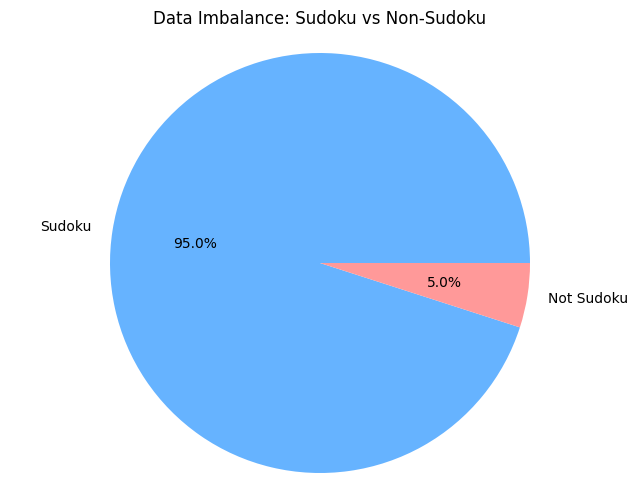

Total number of puzzles with 'sudoku' in their type: 9504


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/data.csv')

sudoku_columns = [col for col in df.columns if 'sudoku' in col.lower()]

df['is_sudoku'] = df[sudoku_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

sudoku_counts = df['is_sudoku'].value_counts()

labels = ['Sudoku' if index == 1 else 'Not Sudoku' for index in sudoku_counts.index]

plt.figure(figsize=(8, 6))
plt.pie(sudoku_counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Data Imbalance: Sudoku vs Non-Sudoku')
plt.axis('equal')
plt.show()

total_sudoku_puzzles = df['is_sudoku'].sum()
print(f"Total number of puzzles with 'sudoku' in their type: {total_sudoku_puzzles}")

In [55]:
import pandas as pd

df = pd.read_csv('../data/data.csv')

df['is_sudoku'] = df.filter(like='sudoku').sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

df_to_save = df[['features', 'is_sudoku']].rename(columns={'is_sudoku': 'target'})

df_to_save.to_csv('../data/data_sudoku.csv', index=False)

In [57]:
import pandas as pd

df = pd.read_csv('../data/data.csv')

df['is_sudoku'] = df.filter(like='sudoku').sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

has_columns = [col for col in df.columns if col.startswith('has')]

df_to_save = df[['features', 'is_sudoku'] + has_columns].rename(columns={'is_sudoku': 'target'})

df_to_save.to_csv('../data/data_sudoku.csv', index=False)